In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random

In [47]:
classes = {"no_tumor":0,"pituitary_tumor":1}
X = []
Y = []
for _class in classes:
    path = 'Training/'+ _class
    for i in os.listdir(path):
        image = cv2.imread(path+'/'+i,0)
        image = cv2.resize(image,(200,200))
        X.append(image)
        Y.append(classes[_class])

In [48]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(len(X),-1)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=0,
                                               test_size=.20)

In [50]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [51]:
sv = SVC(kernel="poly",degree=2,coef0=20,random_state=0)
sv.fit(xtrain, ytrain)

SVC(coef0=20, degree=2, kernel='poly', random_state=0)

In [52]:
ypred = sv.predict(xtest)
cm = confusion_matrix(ytest, ypred)

print("Confusion matrix: ")
print(cm)

print("Accuracy: ")
print(accuracy_score(ytest, ypred))

Confusion matrix: 
[[ 59   4]
 [  0 182]]
Accuracy: 
0.9836734693877551


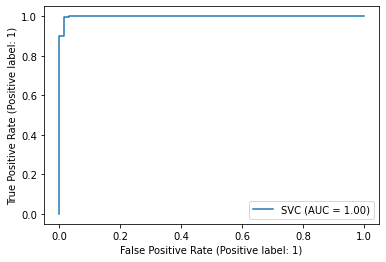

In [53]:
svc_disp = plot_roc_curve(sv, xtest, ytest)
plt.show()

In [54]:
seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [55]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(xtrain, ytrain, validation_data = (xtest,ytest), epochs = 100, batch_size = 60)

Epoch 1/100
17/17 [==============================] - 1s 31ms/step - loss: 0.4420 - accuracy: 0.8659 - val_loss: 0.3871 - val_accuracy: 0.9061
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.3724 - accuracy: 0.9191 - val_loss: 0.3581 - val_accuracy: 0.9020
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 0.3459 - accuracy: 0.9212 - val_loss: 0.3302 - val_accuracy: 0.9143
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.3129 - accuracy: 0.9243 - val_loss: 0.3059 - val_accuracy: 0.9184
Epoch 5/100
17/17 [==============================] - 0s 16ms/step - loss: 0.2838 - accuracy: 0.9304 - val_loss: 0.2817 - val_accuracy: 0.9265
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.2606 - accuracy: 0.9324 - val_loss: 0.2692 - val_accuracy: 0.9184
Epoch 7/100
17/17 [==============================] - 0s 16ms/step - loss: 0.2379 - accuracy: 0.9365 - val_loss: 0.2362 - val_accuracy: 0.9306
Epoch 

17/17 [==============================] - 0s 17ms/step - loss: 0.0225 - accuracy: 0.9959 - val_loss: 0.0714 - val_accuracy: 0.9837
Epoch 59/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0221 - accuracy: 0.9959 - val_loss: 0.0717 - val_accuracy: 0.9837
Epoch 60/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0217 - accuracy: 0.9959 - val_loss: 0.0719 - val_accuracy: 0.9837
Epoch 61/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0213 - accuracy: 0.9959 - val_loss: 0.0720 - val_accuracy: 0.9837
Epoch 62/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0210 - accuracy: 0.9959 - val_loss: 0.0723 - val_accuracy: 0.9837
Epoch 63/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0207 - accuracy: 0.9959 - val_loss: 0.0721 - val_accuracy: 0.9837
Epoch 64/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0205 - accuracy: 0.9959 - val_loss: 0.0723 - val_accuracy: 0.9837
Epoch 65/100

In [57]:
y_pred = ann.predict(xtest)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(ytest, y_pred)
print(cm)
accuracy_score(ytest, y_pred)

[[ 60   3]
 [  1 181]]


0.9836734693877551

In [58]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

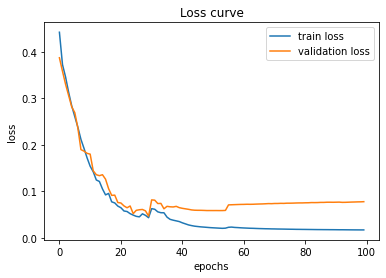

In [59]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Loss curve')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

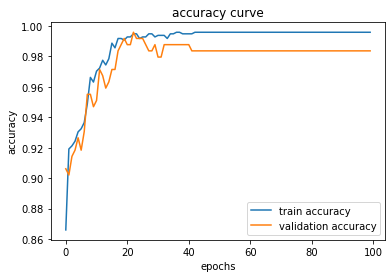

In [60]:
plt.plot(history.history['accuracy'] , label = 'train accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

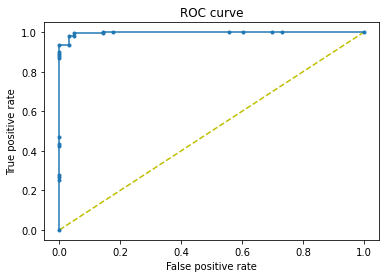

In [61]:
y_preds = ann.predict(xtest).ravel()

fpr, tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()